<a href="https://colab.research.google.com/github/withravel/NUS-MCom/blob/IS5006/Zhao_Lijie_FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:

!pip install scikit-fuzzy
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

"""The data set with the format of crypto name, yearly return in percentage and risk in percentage"""

cryptos = [
    ('a', 25, 40), ('b', 40, 12), ('c', 15, 30),
    ('d', 10, 12), ('e', 13, 5), ('f', 12, 4),
    ('g', 23, 16),('h', 10, 13), ('i', 8, 12),
    ('j', 13, 12), ('k', 11, 14)
]


def crypto_Grading():

  """Define variables for the loop to call each crypto in the list"""
  length = len(cryptos)
  i=0
  """Define variables to search for cryptos with highest and lowest grade"""
  maxGradeValue=0
  minGradeValue=100
  maxYearlyReturn=0
  minYearlyReturn=0
  maxRisk=0
  minRisk=0
  maxCrypto=''
  minCrypto=''

  """Define variables for the universe"""
  """The universe set for annual return is between 0 to 50, for the risk is between 0 to 75 and for the
  grade is between 0 to 100, inclusive."""

  yearlyReturn = ctrl.Antecedent(np.arange(0, 51, 1), 'yearlyReturn')
  risk = ctrl.Antecedent(np.arange(0, 76, 1), 'risk')

  grade = ctrl.Consequent(np.arange(0, 101, 1), 'grade')

  yearlyReturn.automf(3)

  yearlyReturn.view()


  risk['good'] = fuzz.trimf(risk.universe, [0, 0, 37.5])
  risk['average'] = fuzz.trimf(risk.universe, [0, 37.5, 75])
  risk['poor'] = fuzz.trimf(risk.universe, [37.5, 75, 75])
  risk.view()

  grade['Poor'] = fuzz.trimf(grade.universe, [0, 0, 50])
  grade['Average'] = fuzz.trimf(grade.universe, [0, 50, 100])
  grade['Good'] = fuzz.trimf(grade.universe, [50, 100, 100])

  grade.view()

  """The rules are the following:
  ● If yearly return is poor or risk is poor the the grade is poor
  ● If both the yearly return and the risk is average then the grade is poor
  ● If the yearly return is average but the risk is good then the grade is average
  ● If the yearly return is good but the the risk is average then the grade is average
  """
  rule1 = ctrl.Rule(yearlyReturn['poor'] , grade['Poor'])
  rule2 = ctrl.Rule(risk['poor'], grade['Poor'])
  rule3 = ctrl.Rule(yearlyReturn['average']|risk['average'], grade['Poor'])
  rule4 = ctrl.Rule(yearlyReturn['average']| risk['good'], grade['Average'])
  rule5 = ctrl.Rule(yearlyReturn['good']|risk['average'], grade['Average'])
  rule6 = ctrl.Rule(yearlyReturn['good'] | risk['good'], grade['Good'])

  investment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
  investment = ctrl.ControlSystemSimulation(investment_ctrl)


  """Invite input to show charts for all cryptos or just the best and worst graded cryptos"""

  print_order=input("Would you like to see grading charts for all crypto or just for the best and worst cryptos? \nType 'a' for all cryptos. Type 'b' for best and worst cryptos: ")

  """Function to display the grading charts for all cryptos or for only the best and worst cryptos"""
  if print_order=='a':
    while i<length:
      crypto=cryptos[i]
      i+=1
      curYearlyReturn = crypto[1]
      curRisk = crypto[2]
      investment.input['yearlyReturn'] = curYearlyReturn
      investment.input['risk'] = curRisk
      investment.compute()
      tempGrade = investment.output['grade']
      grade.view(sim=investment)

  elif print_order=='b':
    while i<length:
      crypto=cryptos[i]
      i+=1
      curYearlyReturn = crypto[1]
      curRisk = crypto[2]
      investment.input['yearlyReturn'] = curYearlyReturn
      investment.input['risk'] = curRisk
      investment.compute()
      tempGrade = investment.output['grade']
      if tempGrade >= maxGradeValue:
        maxGradeValue=tempGrade
        maxYearlyReturn=curYearlyReturn
        maxRisk=curRisk
        maxCrypto=crypto
      if tempGrade <= minGradeValue:
        minGradeValue=tempGrade
        minYearlyReturn=curYearlyReturn
        minRisk=curRisk
        minCrypto=crypto

    print("\n\nCrypto "+maxCrypto[0] + " has the highest grading at "+str(maxGradeValue)+" and is the best to invest in.")
    investment.input['yearlyReturn'] = maxYearlyReturn
    investment.input['risk'] = maxRisk
    investment.compute()
    tempGrade = investment.output['grade']
    grade.view(sim=investment)
      
    print("\n\nCrypto "+minCrypto[0]+" has the lowest grading at "+str(minGradeValue)+" and is the worst to invest in.\n\n")
    investment.input['yearlyReturn'] = minYearlyReturn
    investment.input['risk'] = minRisk
    investment.compute()
    tempGrade = investment.output['grade']
    grade.view(sim=investment)

  return None



Would you like to see grading charts for all crypto or just for the best and worst cryptos? 
Type 'a' for all cryptos. Type 'b' for best and worst cryptos: b


Crypto b has the highest grading at 53.96384449733651 and is the best to invest in.


Crypto a has the lowest grading at 41.66666666666667 and is the worst to invest in.




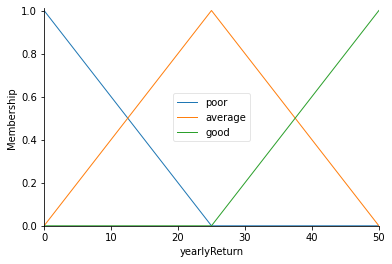

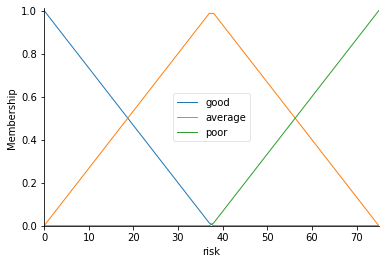

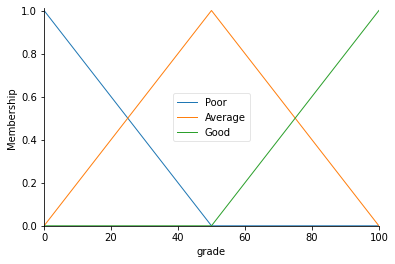

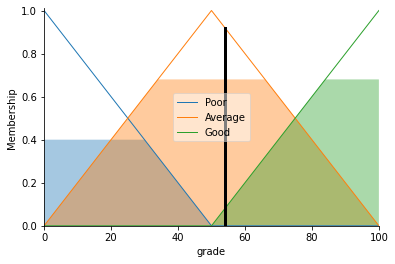

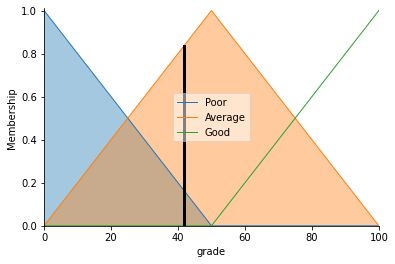

In [209]:
if __name__=='__main__':
  result = crypto_Grading()
